In [3]:
import numpy as np
from skmultiflow.data import FileStream
from skmultiflow.neural_networks import PerceptronMask
from fires import FIRES
from sklearn.metrics import accuracy_score

In [4]:
# paint mnist
import matplotlib.pyplot as plt

def paint_digit(digit_values):
    plt.figure()
    plt.imshow(digit_values.reshape(28,28))
    plt.gray()
    plt.xticks([])
    plt.yticks([])
    
    plt.show

### Test binary version

In [ ]:
# Load data as scikit-multiflow FileStream
#
stream = FileStream('datasets/binary/mnist_train_binary.csv', target_idx=0)
stream.prepare_for_use()

In [ ]:
# Initial fit of the predictive model
predictor = PerceptronMask()
x,y = stream.next_sample(batch_size=100)
predictor.partial_fit(x,y, stream.target_values)

In [ ]:
fires_model = FIRES(n_total_ftr=stream.n_features,
                    target_values=stream.target_values,
                    mu_init=0,
                    sigma_init=1,
                    model='probit')

In [ ]:
n_selected_ftr = 100

while stream.has_more_samples():
    # Load a new sample
    x, y = stream.next_sample(batch_size=10)

    # Select features
    ftr_weights = fires_model.weigh_features(x, y)  # Get feature weights with FIRES
    ftr_selection = np.argsort(ftr_weights)[::-1][:n_selected_ftr]

    # Truncate x (retain only selected features, 'remove' all others, e.g. by replacing them with 0)
    x_reduced = np.zeros(x.shape)
    x_reduced[:, ftr_selection] = x[:, ftr_selection]

    # Test
    y_pred = predictor.predict(x)
    print(accuracy_score(y, y_pred))

    # Train
    predictor.partial_fit(x, y)

# Restart the FileStream
stream.restart()

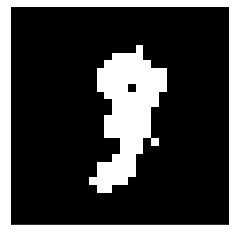

In [14]:
paint_digits = np.zeros(784)
paint_digits[ftr_selection] = 1


paint_digit(paint_digits)

### Test multiclass version

In [5]:
# test multiclass

stream = FileStream('datasets/Multiclass/mnist_train_normalized.csv', target_idx=0)
stream.prepare_for_use()

In [6]:

# Initial fit of the predictive model
predictor = PerceptronMask()
x,y = stream.next_sample(batch_size=100)
predictor.partial_fit(x,y, stream.target_values)

PerceptronMask(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
               fit_intercept=True, max_iter=1000, n_iter_no_change=5,
               n_jobs=None, penalty=None, random_state=0, shuffle=True,
               tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

In [7]:
fires_model = FIRES(n_total_ftr=stream.n_features,
                    target_values=stream.target_values,
                    mu_init=0,
                    sigma_init=1,
                    model='softmax')

In [8]:
n_selected_ftr = 100
i = 0
while i < 5:  #stream.has_more_samples():
    # Load a new sample
    x, y = stream.next_sample(batch_size=10)
    # Select features
    ftr_weights = fires_model.weigh_features(x, y)  # Get feature weights with FIRES
    ftr_selection = np.argsort(ftr_weights)[::-1][:n_selected_ftr]

    # Truncate x (retain only selected features, 'remove' all others, e.g. by replacing them with 0)
    x_reduced = np.zeros(x.shape)
    x_reduced[:, ftr_selection] = x[:, ftr_selection]

    # Test
    y_pred = predictor.predict(x)
    print(accuracy_score(y, y_pred))

    # Train
    predictor.partial_fit(x, y)
    i += 1
# Restart the FileStream
stream.restart()

len(y) 2
obs_class: 0, n obs: 1
obs_class: 1, n obs: 3
obs_class: 2, n obs: 1
obs_class: 3, n obs: 1
obs_class: 5, n obs: 1
obs_class: 6, n obs: 1
obs_class: 7, n obs: 2
0.6
len(y) 2
obs_class: 0, n obs: 3
obs_class: 1, n obs: 2
obs_class: 2, n obs: 1
obs_class: 3, n obs: 1
obs_class: 4, n obs: 1
obs_class: 9, n obs: 2
0.7
len(y) 2
obs_class: 0, n obs: 1
obs_class: 1, n obs: 2
obs_class: 2, n obs: 2
obs_class: 4, n obs: 1
obs_class: 6, n obs: 2
obs_class: 7, n obs: 1
obs_class: 8, n obs: 1
0.8
len(y) 2
obs_class: 1, n obs: 1
obs_class: 3, n obs: 3
obs_class: 4, n obs: 2
obs_class: 5, n obs: 2
obs_class: 8, n obs: 1
obs_class: 9, n obs: 1
0.4
len(y) 2
obs_class: 2, n obs: 1
obs_class: 3, n obs: 1
obs_class: 4, n obs: 1
obs_class: 5, n obs: 1
obs_class: 6, n obs: 1
obs_class: 7, n obs: 3
obs_class: 8, n obs: 2
0.7


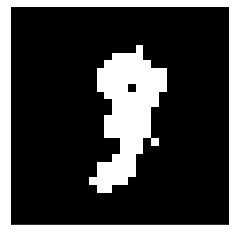

In [15]:
paint_digits = np.zeros(784)
paint_digits[ftr_selection] = 1


paint_digit(paint_digits)

### test regression version